# Computational Structural Design II - Mesh Datastructure II

### Learning Goal: 
- Mesh and half-edge data structure
- How to solve topological questions
- Mesh Attributes


### Content:
- A. Half-edge Datastucture


# A. Mesh and Half-Edge Datastructure

## A_1. COMPAS Mesh and Half-edge Datastructure
A mesh can be constructed from vertex and face information. However, how can we answer the **topological questions**? </br>
e.g. Which vertices are connected with vertex 4? Which faces are surrending vertex 4? 

In [17]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vertex_color = {4: (1.0, 0.0, 0.0)}

plotter = Plotter()

meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_edgelabels()
meshartist.draw_facelabels()

plotter.zoom_extents()
plotter.show()

In COMPAS, meshes are presented using a half-edge data structure. In a half-edge data structure, each **edge** is composed of **a pair of half-edge twins** that point at opposite orientations. `mesh.half_edge` tells the half edge information. A vertex stores a reference to a half-edge that originates from that vertex, and the face that half-edge belongs to. For an edge on the boundary, one of the half-edge pairs belongs to an non-existing `None` face.

| u | v | fkey |
| :---: | :---: | :---: |
| 0 | 1 | 0 |
|   | 3 | None |
| 1 | 0 | None |
|   | 4 | 0 |
|   | 2 | 1 |
| 2 | 1 | None |
|   | 5 | 1 |
| 3 | 4 | 2 |
|   | 0 | 0 |
|   | 6 | None |
| 4 | 1 | 1 |
|   | 3 | 0 |
|   | 5 | 3 |
|   | 7 | 2 |
| 5 | 2 | None |
|   | 4 | 1 |
|   | 8 | 3 |
| 6 | 7 | None |
|   | 3 | 2 |
| 7 | 4 | 3 |
|   | 6 | 2 |
|   | 8 | None |
| 8 | 5 | None |
|   | 7 | 3 |

## EXPLAIN how the half-edge is constructed while using add vertex and add face to the mesh....

In [18]:
print(mesh.halfedge) # get halfedge information

{0: {1: 0, 3: None}, 1: {0: None, 4: 0, 2: 1}, 2: {1: None, 5: 1}, 3: {4: 2, 0: 0, 6: None}, 4: {1: 1, 3: 0, 5: 3, 7: 2}, 5: {2: None, 4: 1, 8: 3}, 6: {7: None, 3: 2}, 7: {4: 3, 6: 2, 8: None}, 8: {5: None, 7: 3}}


In [19]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vertex_color = {4: (1.0, 0.0, 0.0)}

plotter = Plotter()

meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_edgelabels()
meshartist.draw_facelabels()
meshartist.draw_halfedges()

plotter.zoom_extents()
plotter.show()

In [24]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vertex_color = {4: (1.0, 0.0, 0.0)}
halfedge_color = {}
for u, v in mesh.edges():
    if mesh.halfedge_face(u, v) is None:
        color = (0.0, 0.0, 1.0)
    else:
        color = (0.0, 1.0, 0.0)
    halfedge_color[u, v] = color

    if mesh.halfedge_face(v, u) is None:
        color = (0.0, 0.0, 1.0)
    else:
        color = (0.0, 1.0, 0.0)

    halfedge_color[v, u] = color


plotter = Plotter()
meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_edgelabels()
meshartist.draw_facelabels()
meshartist.draw_halfedges(color=halfedge_color)
plotter.zoom_extents()
plotter.show()

## A_2. Twin, Next, and Previous Half-edges

In the Polygon, the line segments form a continuous cycle, connecting the vertices in order. These directed line segments are called half-edge. If an edge is shared by two faces, it can be decomposed into 2 twin half-edges, which have the opposite directions and each face can have a half-edge. The half-edge adjacencies define the connectivity of faces. 


<img src="https://files.gitbook.com/v0/b/gitbook-legacy-files/o/assets%2F-M730QpQnbAMvz44bqhc%2F-MOH3yDnBEO8NEXs8leP%2F-MOHIkRqhipSVWxsGy4m%2Fimage.png?alt=media&token=b585d605-e4c7-4689-935d-5b6623fe679d" width="500" style="margin-left:auto; margin-right:auto"/>
</br>


### A_2a. Twin Half-Edges

True


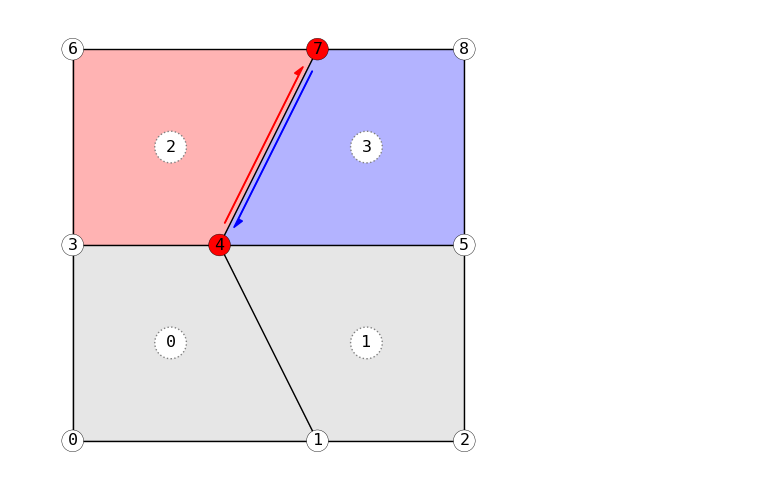

In [31]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

U, V = 4, 7
vertex_color = {U: (1.0, 0.0, 0.0), V: (1.0, 0.0, 0.0)}
halfedges = [(U, V), (V, U)]

print(mesh.halfedge[U][V] == mesh.halfedge_face(U, V))

face_color = {
   mesh.halfedge_face(U, V): (1.0, 0.7, 0.7),
   mesh.halfedge_face(V, U): (0.7, 0.7, 1.0)
}

halfedge_color = {
   (U, V): (1.0, 0.0, 0.0),
   (V, U): (0.0, 0.0, 1.0)
}


plotter = Plotter()
meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color, facecolor=face_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
meshartist.draw_halfedges(halfedges=halfedges, color=halfedge_color)
plotter.zoom_extents()
plotter.show()

### A_2a. Next Half-Edges

In [38]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vkey = 4

vertex_color = {vkey: (1.0, 0.0, 0.0)}
edge_color = {}
edge_width = {}

print(list(mesh.halfedge[vkey].keys()))

for nbr in mesh.vertex_neighbors(VERTEX):
    vertex_color[nbr] = (1.0, 0.9, 0.9)

for edge in mesh.vertex_edges(VERTEX):
    edge_color[edge] = (1.0, 0.0, 0.0)
    edge_width[edge] = 2.0


plotter = Plotter()
meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color, edgecolor=edge_color, edgewidth=edge_width)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

[1, 3, 5, 7]


[1, 3, 5, 7]


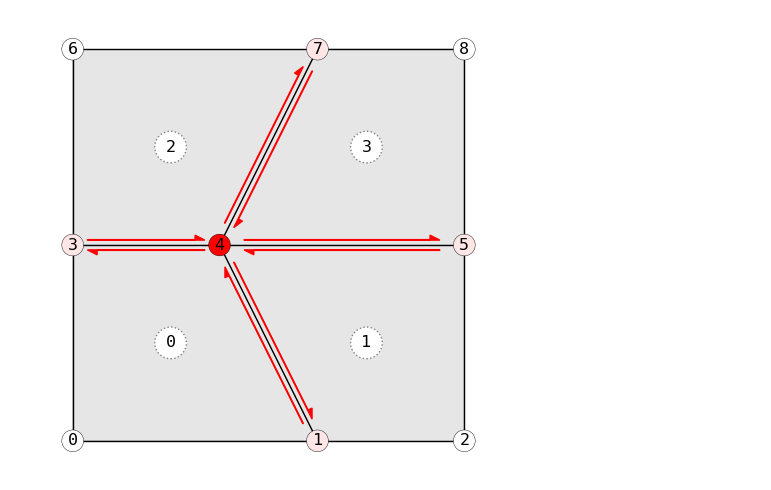

In [45]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vkey = 4

vertex_color = {vkey: (1.0, 0.0, 0.0)}

print(list(mesh.halfedge[vkey].keys()))

for nbr in mesh.vertex_neighbors(VERTEX):
    vertex_color[nbr] = (1.0, 0.9, 0.9)

halfedges = []
for u, v in mesh.vertex_edges(VERTEX):
    halfedges.append((u, v))
    halfedges.append((v, u))


plotter = Plotter()
meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
meshartist.draw_halfedges(halfedges=halfedges, color=(1.0, 0.0, 0.0))
plotter.zoom_extents()
plotter.show()

[1, 3, 5, 7]


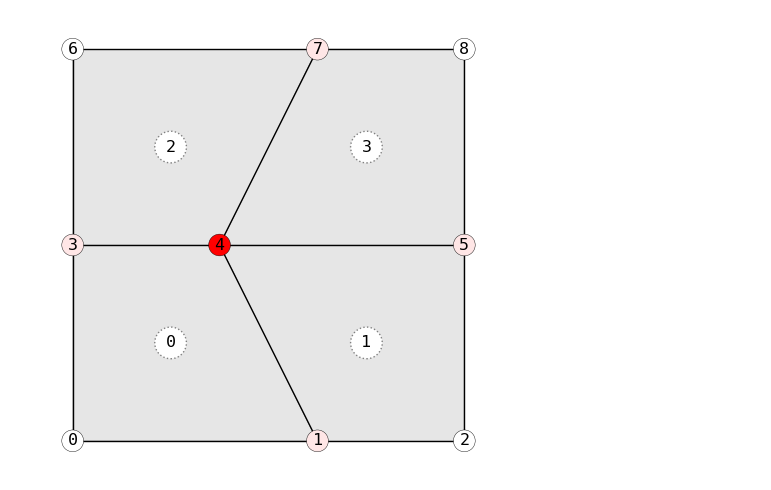

---

# B. Topology
## B1. Vertex
### B1_a. Vertex Neighbours

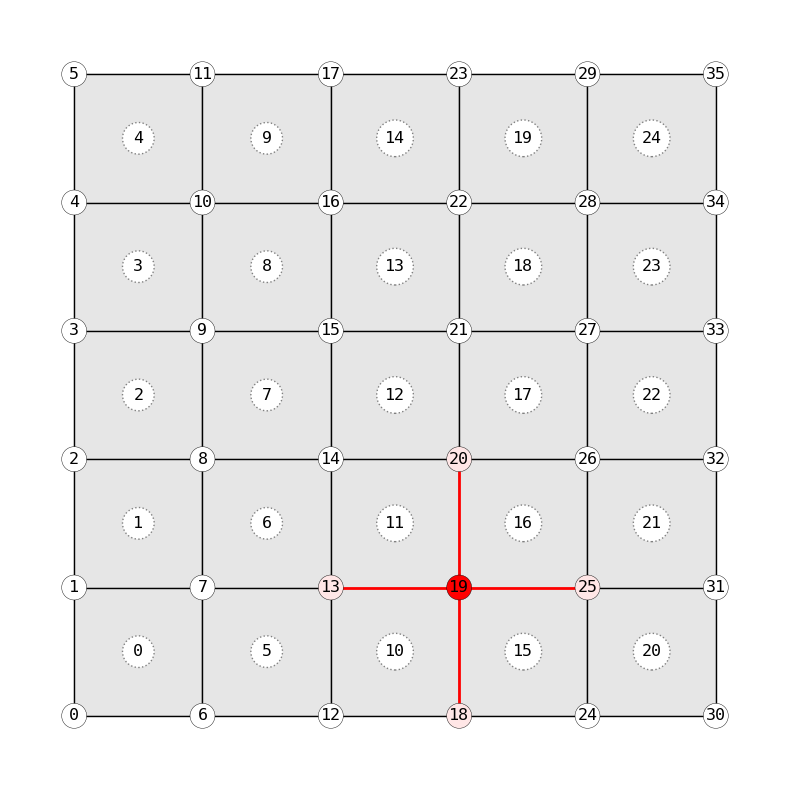

In [97]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find vertex neighbours
# vkey = 20
vkey = mesh.get_any_vertex()
v_nbrs = mesh.vertex_neighbors(vkey)

# visualization
vertex_color = {vkey: (1.0, 0.0, 0.0)}
edge_color = {}
edge_width = {}

for v_nbr in v_nbrs:
    vertex_color[v_nbr] = (1.0, 0.9, 0.9)
    edge_color[(vkey, v_nbr)] = (1.0, 0.0, 0.0)
    edge_width[(vkey, v_nbr)] = 2.0

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, vertexcolor=vertex_color, edgecolor=edge_color, edgewidth=edge_width)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

### B1_b. Vertex Degree
In mesh, the degree (or valency) of a vertex is the number of edges that are incident to the vertex.  The maximum degree of a mesh, and the minimum degree of a mesh, are the maximum and minimum of its vertices' degrees. 

In [101]:
from compas.datastructures import Mesh# vertex degree
# for vkey in mesh.vertices():
#     print(mesh.vertex_degree(vkey), end="  ")

vkey = mesh.get_any_vertex()
print("vertex", vkey, "degree", mesh.vertex_degree(vkey))

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)



vertex 4 degree 3


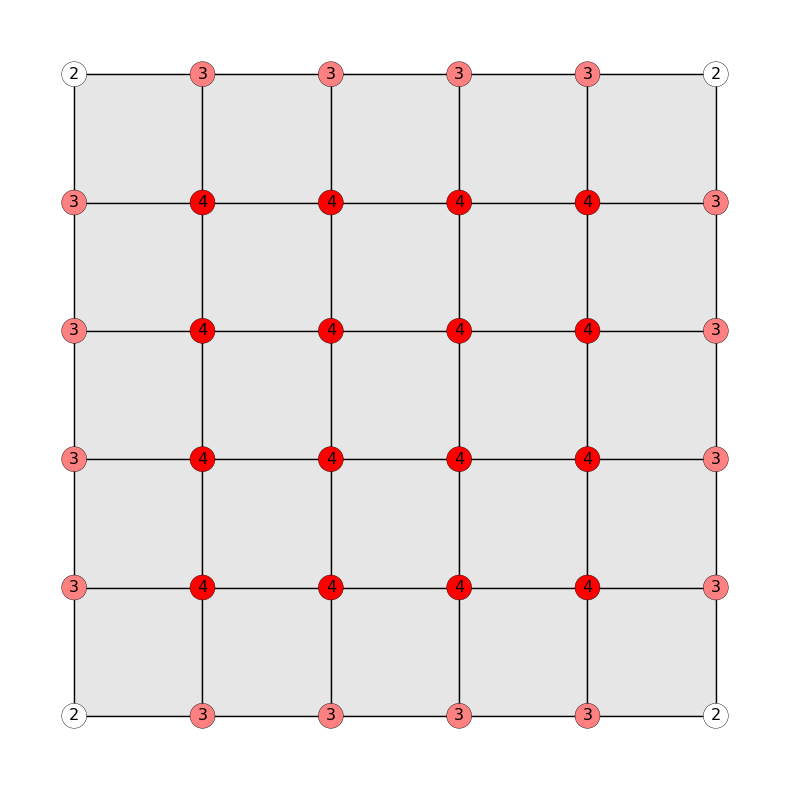

In [133]:
from compas.datastructures import Mesh
from compas_plotters import Plotter
from compas.utilities import i_to_red

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# visualization
vertex_text = {}
vertex_color = {}
max_vertex_degree = mesh.vertex_max_degree()
min_vertex_degree = mesh.vertex_min_degree()

for vkey in mesh.vertices():
    vertex_degree = mesh.vertex_degree(vkey)
    vertex_text[vkey] = str(vertex_degree)
    vertex_color[vkey] = i_to_red(float((vertex_degree - min_vertex_degree) / (max_vertex_degree - min_vertex_degree)), normalize=True)

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, vertexcolor=vertex_color)
meshartist.draw_vertexlabels(text=vertex_text)
# meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

WE can use vertex degrees to find supports.

In [141]:
from compas.datastructures import Mesh
from compas.geometry import Sphere
from compas_notebook.app import App

mesh = Mesh.from_json("https://raw.githubusercontent.com/BlockResearchGroup/CSD2_2022/main/3_Materialization/Tutorial5/data/simple_dome.json")

viewer = App()

for vkey in mesh.vertices():
    if mesh.vertex_degree(vkey) == 2:
        viewer.add(Sphere(mesh.vertex_coordinates(vkey), 0.5), facecolor=(0.7, 0., 0.7))

viewer.add(mesh)
viewer.show()

### B1_c. Vertex Faces

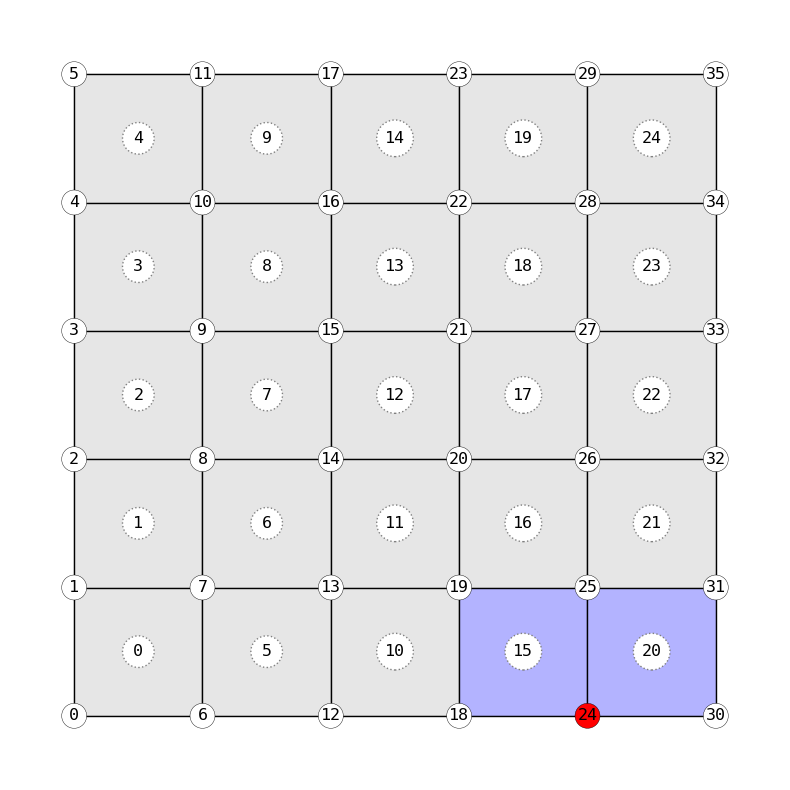

In [104]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find vertex faces
# vkey = 20
vkey = mesh.get_any_vertex()
f_nbrs = mesh.vertex_faces(vkey)

# visualization
vertex_color = {vkey: (1.0, 0.0, 0.0)}
face_color = {f_nbr: (0.7, 0.7, 1.0) for f_nbr in f_nbrs}

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, vertexcolor=vertex_color, facecolor=face_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

### B1_d. Vertex Area
Compute the tributary area of a vertex. Tributary area is often used to estimate design loads of structural elements subjected to vertical surface loading. 

In [109]:
from compas.datastructures import Mesh

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find vertex tributary area
vkey = mesh.get_any_vertex()
print("vertex", vkey, "area", mesh.vertex_area(vkey))

vertex 33 area 0.5


## B2. Face
### B2_a. Face Neighbours¶

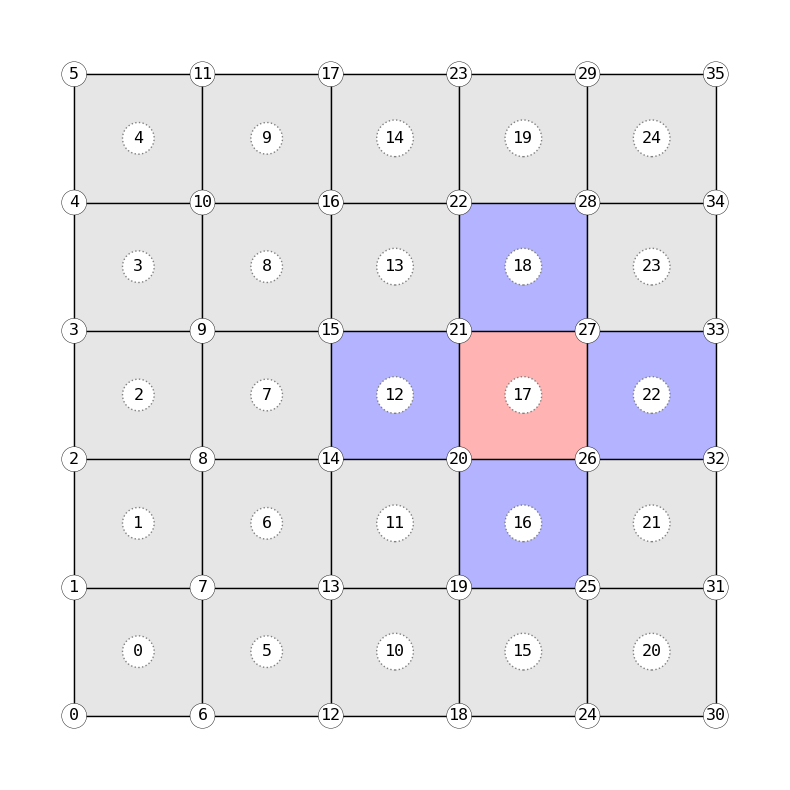

In [112]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find face neighbours
# fkey = 15
fkey = mesh.get_any_face()
f_nbrs = mesh.face_neighbors(fkey)

# visualization
face_color = {}
face_color[fkey] = (1.0, 0.7, 0.7)
for f_nbr in f_nbrs:
    face_color[f_nbr] = (0.7, 0.7, 1.0)

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, facecolor=face_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

### B2_b. Face Degree

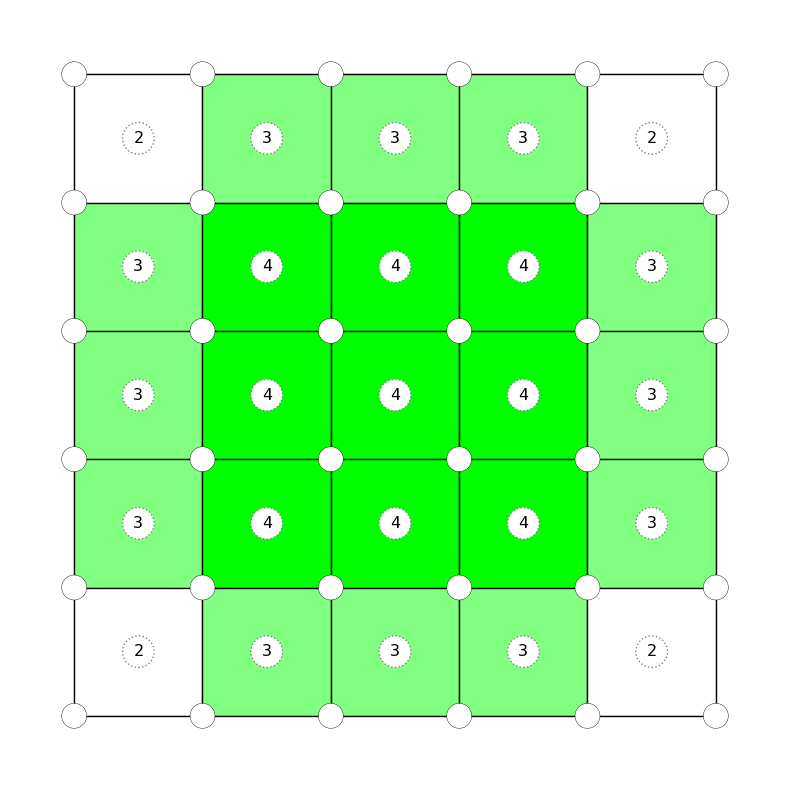

In [132]:
from compas.datastructures import Mesh
from compas_plotters import Plotter
from compas.utilities import i_to_green

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# visualization
face_text = {}
face_color = {}
max_face_degree = mesh.face_max_degree()
min_face_degree = mesh.face_min_degree()

for fkey in mesh.faces():
    face_degree = mesh.face_degree(fkey)
    face_text[fkey] = str(face_degree)
    face_color[fkey] = i_to_green(float((face_degree - min_face_degree) / (max_face_degree - min_face_degree)), normalize=True)

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, facecolor=face_color)
# meshartist.draw_vertexlabels()
meshartist.draw_facelabels(text=face_text)
plotter.zoom_extents()
plotter.show()

## B3. Edges
quad mesh

### B3_a. Edge Loop

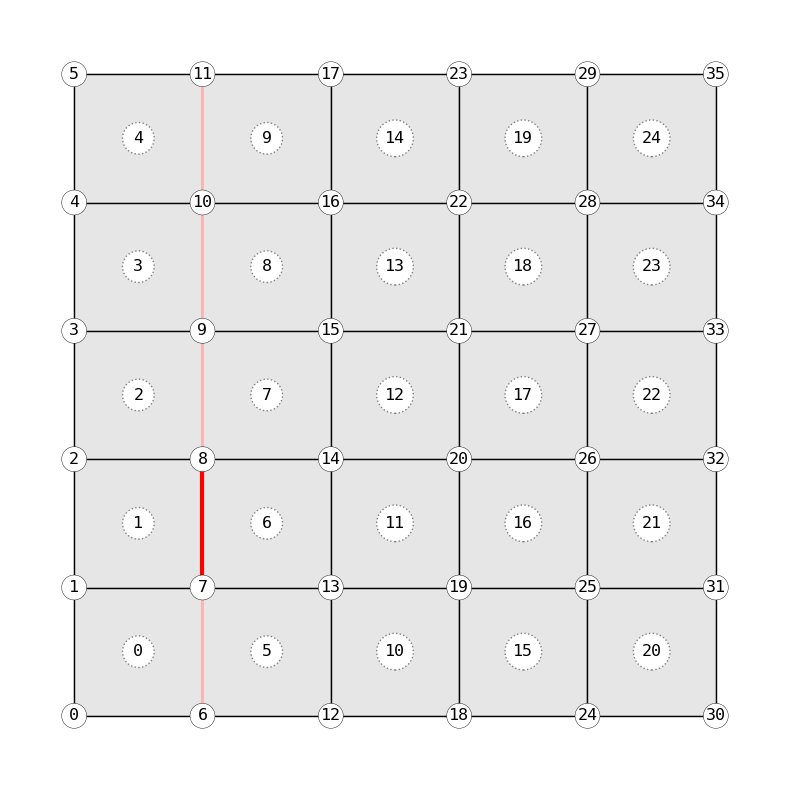

In [152]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find edge loop
# start_edge = 21, 27
vkey = mesh.get_any_vertex()
vkey_nbr = mesh.vertex_neighbors(vkey)[0]
start_edge = vkey, vkey_nbr
loop = mesh.edge_loop(start_edge)

# visualization
edge_color = {}
edge_width = {}

for edge in loop: 
    edge_color[edge] = (1.0, 0.7, 0.7)
    edge_width[edge] = 2.0

edge_color[start_edge] = (1.0, 0.0, 0.0)
edge_width[start_edge] = 3.0
    
# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, edgecolor=edge_color, edgewidth=edge_width)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

In [192]:
from compas.geometry import Point, Line
from compas.datastructures import Mesh
from compas_notebook.app import App

mesh = Mesh.from_obj('data/tubemesh.obj')
mesh.flip_cycles()

viewer = App()
viewer.add(mesh) # add the mesh before lines

vkey = mesh.get_any_vertex()
vkey_nbr = mesh.vertex_neighbors(vkey)[0]
start_edge = vkey, vkey_nbr
loop = mesh.edge_loop(start_edge)

for edge in loop:
    a, b = mesh.edge_coordinates(*edge)
    line = Line(a, b)
    viewer.add(line, linecolor=(0, 1.0, 0))

viewer.show()

### B3_b. Edge Strip

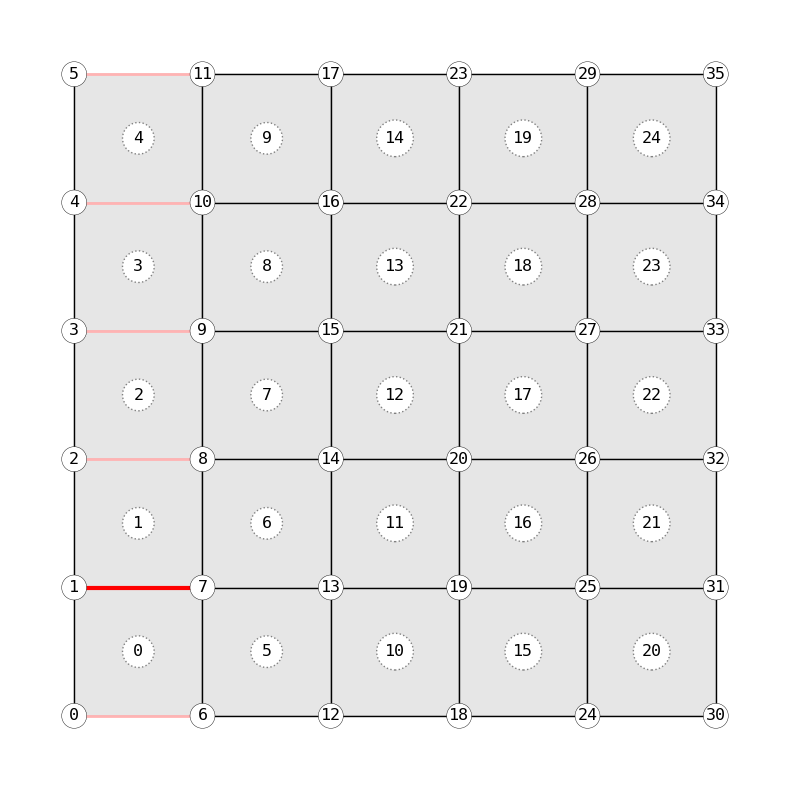

In [159]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find edge loop
# start_edge = 21, 27
vkey = mesh.get_any_vertex()
vkey_nbr = mesh.vertex_neighbors(vkey)[0]
start_edge = vkey, vkey_nbr
loop = mesh.edge_strip(start_edge)

# visualization
edge_color = {}
edge_width = {}

for edge in loop: 
    edge_color[edge] = (1.0, 0.7, 0.7)
    edge_width[edge] = 2.0

edge_color[start_edge] = (1.0, 0.0, 0.0)
edge_width[start_edge] = 3.0
    
# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, edgecolor=edge_color, edgewidth=edge_width)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

In [191]:
from compas.geometry import Point, Line
from compas.datastructures import Mesh
from compas_notebook.app import App

mesh = Mesh.from_obj('data/tubemesh.obj')
mesh.flip_cycles()

viewer = App()
viewer.add(mesh) # add the mesh before lines

vkey = mesh.get_any_vertex()
vkey_nbr = mesh.vertex_neighbors(vkey)[0]
start_edge = vkey, vkey_nbr
loop = mesh.edge_strip(start_edge)


for edge in loop:
    a, b = mesh.edge_coordinates(*edge)
    line = Line(a, b)
    viewer.add(line, linecolor=(0, 1.0, 0))

viewer.show()

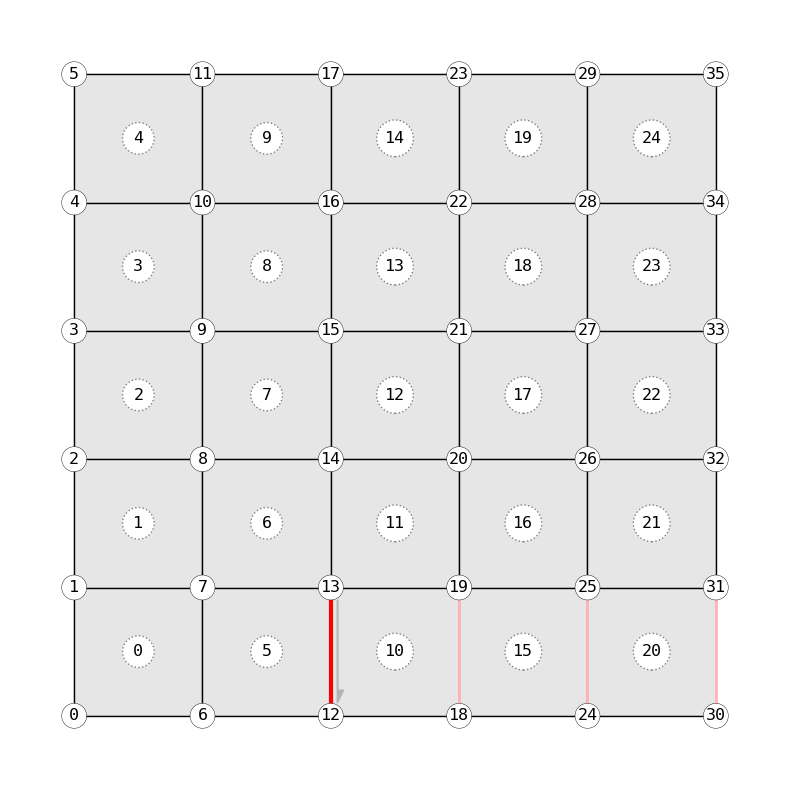

In [211]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find edge loop
# start_edge = 21, 27
vkey = mesh.get_any_vertex()
vkey_nbr = mesh.vertex_neighbors(vkey)[0]
start_edge = vkey, vkey_nbr
loop = mesh.halfedge_strip(start_edge)

# visualization
edge_color = {}
edge_width = {}

for edge in loop: 
    edge_color[edge] = (1.0, 0.7, 0.7)
    edge_width[edge] = 2.0

edge_color[start_edge] = (1.0, 0.0, 0.0)
edge_width[start_edge] = 3.0
    
# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, edgecolor=edge_color, edgewidth=edge_width)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
meshartist.draw_halfedges(halfedges=[start_edge])
plotter.zoom_extents()
plotter.show()

In [224]:
from math import radians
import compas
from compas.geometry import Point, Line
from compas.datastructures import Mesh

from compas_notebook.app import App

mesh = Mesh.from_obj('data/tubemesh.obj')
mesh.flip_cycles()

viewer = App()
viewer.add(mesh) # add the mesh before lines

# find edge loop
# start_edge = 21, 27
vkey = mesh.get_any_vertex()
vkey_nbr = mesh.vertex_neighbors(vkey)[0]
start_edge = vkey, vkey_nbr
loop = mesh.edge_loop(start_edge)

for edge in loop:
    a, b = mesh.edge_coordinates(*edge)
    line = Line(a, b)
    viewer.add(line, linecolor=(0, 1.0, 0))

facecolors = {face: (0.7, 0.7, 0.7) for face in mesh.faces()}

for u, v in loop[::2]:
    for edge in mesh.halfedge_strip((u, v)):
        face = mesh.halfedge_face(*edge)
        if face != None:
            facecolors[face] = (1.0, 0.8, 0.8)

for u, v in loop[1::2]:
    for edge in mesh.halfedge_strip((v, u)):
        face = mesh.halfedge_face(*edge)
        if face != None:
            facecolors[face] = (1.0, 0.8, 0.8)

viewer.add(mesh, facecolor=facecolors)

viewer.show()


---
# C. Attributes

## C_1. Extract Attributes
We extract attributes of vertices, faces and edges while iterate through the mesh.

In [230]:
from compas.datastructures import Mesh

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

for vkey, attr in mesh.vertices(data=True):
    print(vkey, attr)
    # print(mesh.vertex_attributes(vkey))
    # print(mesh.vertex_attribute(vkey, 'x'))
    
for fkey, attr in mesh.faces(data=True):
    print(fkey, attr)
    
for edge, attr in mesh.edges(data=True):
    print(edge, attr)

0 {'z': 0, 'x': 0, 'y': 0}
1 {'z': 0, 'x': 2.5, 'y': 0}
2 {'z': 0, 'x': 4, 'y': 0}
3 {'z': 0, 'x': 0, 'y': 2}
4 {'z': 0, 'x': 1.5, 'y': 2}
5 {'z': 0, 'x': 4, 'y': 2}
6 {'z': 0, 'x': 0, 'y': 4}
7 {'z': 0, 'x': 2.5, 'y': 4}
8 {'z': 0, 'x': 4, 'y': 4}
0 {}
1 {}
2 {}
3 {}
(0, 1) {}
(0, 3) {}
(1, 4) {}
(1, 2) {}
(2, 5) {}
(3, 4) {}
(3, 6) {}
(4, 5) {}
(4, 7) {}
(5, 8) {}
(6, 7) {}
(7, 8) {}


If we want to know specific attributes, we can use the following methods.

In [233]:
# attributes
print(mesh.vertices_attributes('xyz'))
print(mesh.vertices_attributes('x'))

# attribute
print(mesh.vertices_attribute('x'))

[[0, 0, 0], [2.5, 0, 0], [4, 0, 0], [0, 2, 0], [1.5, 2, 0], [4, 2, 0], [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]
[[0], [2.5], [4], [0], [1.5], [4], [0], [2.5], [4]]
[0, 2.5, 4, 0, 1.5, 4, 0, 2.5, 4]


`esh.vertices_where`, `Mesh.faces_where` and `Mesh.edges_where` can find elements of the mesh under a specific or a set of conditions.

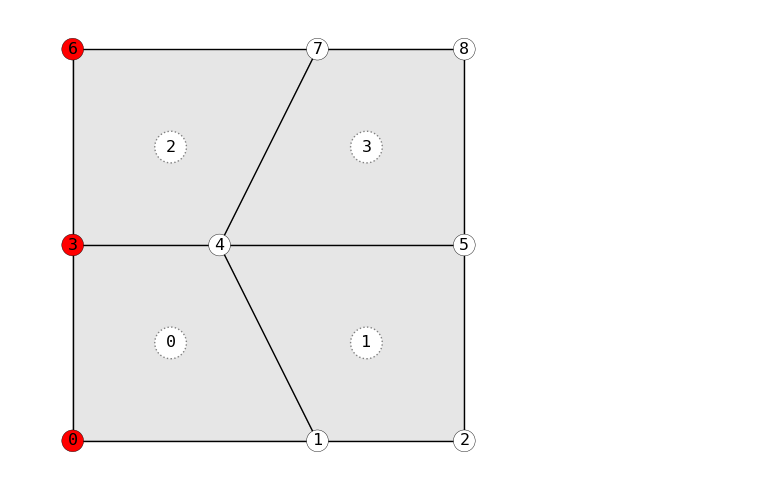

In [247]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

# find vertices
vkeys = mesh.vertices_where({'x': 0})
vertex_color = {vkey: (1.0, 0.0, 0.0) for vkey in vkeys}

plotter = Plotter()

meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()

plotter.zoom_extents()
plotter.show()

## C_2. Modify Attributes

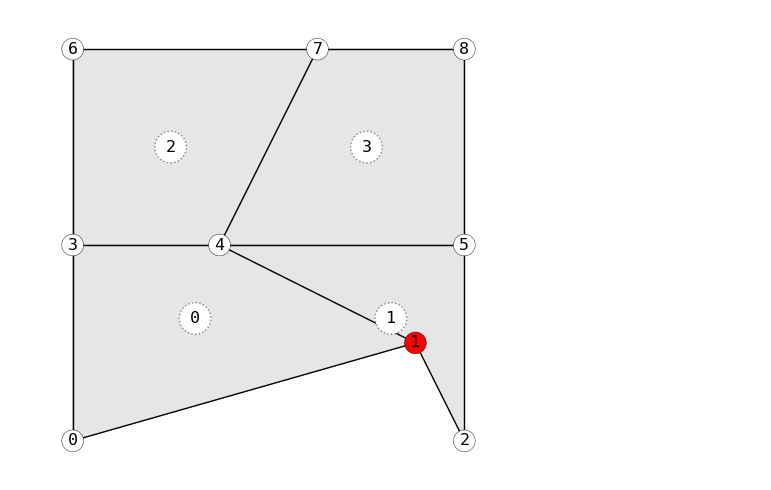

In [242]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vkey = mesh.get_any_vertex()

# modify x, y coordinates
ori_x = mesh.vertex_attribute(vkey, "x")
ori_y = mesh.vertex_attribute(vkey, "y")
mesh.vertex_attribute(vkey, "x", ori_x + 1) 
mesh.vertex_attribute(vkey, "y", ori_y + 1) 

vertex_color = {vkey: (1.0, 0.0, 0.0)}

plotter = Plotter()

meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()

plotter.zoom_extents()
plotter.show()

## C3. Update Attributes

In [249]:
from compas.datastructures import Mesh

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

mesh.update_default_vertex_attributes({"fixed": False})
mesh.update_default_edge_attributes({"q": 1.0})
mesh.update_default_face_attributes({"colored": False})

for vkey, attr in mesh.vertices(data=True):
    print(vkey, attr)
    
for fkey, attr in mesh.faces(data=True):
    print(fkey, attr)
    
for edge, attr in mesh.edges(data=True):
    print(edge, attr)

0 {'z': 0, 'x': 0, 'y': 0, 'fixed': False}
1 {'z': 0, 'x': 2.5, 'y': 0, 'fixed': False}
2 {'z': 0, 'x': 4, 'y': 0, 'fixed': False}
3 {'z': 0, 'x': 0, 'y': 2, 'fixed': False}
4 {'z': 0, 'x': 1.5, 'y': 2, 'fixed': False}
5 {'z': 0, 'x': 4, 'y': 2, 'fixed': False}
6 {'z': 0, 'x': 0, 'y': 4, 'fixed': False}
7 {'z': 0, 'x': 2.5, 'y': 4, 'fixed': False}
8 {'z': 0, 'x': 4, 'y': 4, 'fixed': False}
0 {'colored': False}
1 {'colored': False}
2 {'colored': False}
3 {'colored': False}
(0, 1) {'q': 1.0}
(0, 3) {'q': 1.0}
(1, 4) {'q': 1.0}
(1, 2) {'q': 1.0}
(2, 5) {'q': 1.0}
(3, 4) {'q': 1.0}
(3, 6) {'q': 1.0}
(4, 5) {'q': 1.0}
(4, 7) {'q': 1.0}
(5, 8) {'q': 1.0}
(6, 7) {'q': 1.0}
(7, 8) {'q': 1.0}


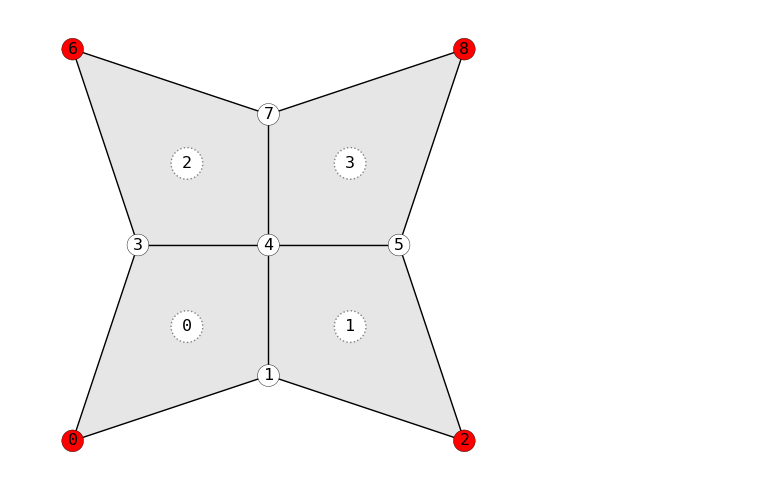

In [5]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

mesh.update_default_vertex_attributes({"fixed": False})

for vkey in mesh.vertices():
    vertex_degree = mesh.vertex_degree(vkey)
    if vertex_degree == 2:
        mesh.vertex_attribute(vkey, 'fixed', True)

fixed_vertices = list(mesh.vertices_where({'fixed': True}))
mesh.smooth_centroid(fixed=fixed_vertices)

vertex_color = {vkey: (1.0, 0.0, 0.0) for vkey in fixed_vertices}

plotter = Plotter()

meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()

plotter.zoom_extents()
plotter.show()

# D. Exercise: Running Bund Barrel Vault

In [16]:
from compas.datastructures import Mesh
from compas_notebook.app import App

mesh= Mesh.from_obj("data/barrel_vault.obj")
mesh = mesh.subdivide(scheme='quad')

viewer=App()
viewer.add(mesh)
viewer.show()

## D1_a. Find Short Boundary

In [32]:
from compas.datastructures import Mesh
from compas.geometry import Line
from compas_notebook.app import App

mesh= Mesh.from_obj("data/barrel_vault.obj")
mesh = mesh.subdivide(scheme='quad')

viewer=App()
viewer.add(mesh)

# find a corner vertex
vkey = list(mesh.vertices_where({'vertex_degree':2}))[0]

# find vertex neighbours
n_1, n_2 = mesh.vertex_neighbors(vkey)

# find two boundary loops
loop_1 = mesh.edge_loop((vkey, n_1))
loop_2 = mesh.edge_loop((vkey, n_2))

# find the shorter boundary loop
if len(loop_1) < len(loop_2):
    short_bdr_loop = loop_1
else:
    short_bdr_loop = loop_2
    
for edge in short_bdr_loop:
    a, b = mesh.edge_coordinates(*edge)
    line = Line(a, b)
    viewer.add(line, linecolor=(0, 1.0, 0))

viewer.show()


[0.0, 0.0, 43.738919459629614] [4.8959101562499825, 0.0, 30.021464381504614]
[4.8959101562499825, 0.0, 30.021464381504614] [9.791820312499965, 0.0, 16.304009303379615]
[9.791820312499965, 0.0, 16.304009303379615] [12.941578124999978, 0.0, 3.2709883072858474]
[12.941578124999978, 0.0, 3.2709883072858474] [16.09133593749999, 0.0, -9.76203268880792]
[16.09133593749999, 0.0, -9.76203268880792] [16.078269531249987, 0.0, -22.483270970057887]
[16.078269531249987, 0.0, -22.483270970057887] [16.065203124999982, 0.0, -35.204509251307854]
[16.065203124999982, 0.0, -35.204509251307854] [12.917707031249961, 0.0, -48.18323630208914]
[12.917707031249961, 0.0, -48.18323630208914] [9.77021093749994, 0.0, -61.16196335287043]
[9.77021093749994, 0.0, -61.16196335287043] [4.88510546874997, 0.0, -74.8420141341204]
[4.88510546874997, 0.0, -74.8420141341204] [0.0, 0.0, -88.52206491537038]


In [42]:
from compas.datastructures import Mesh
from compas.geometry import Line
from compas_notebook.app import App

mesh= Mesh.from_obj("data/barrel_vault.obj")
mesh = mesh.subdivide(scheme='quad')

viewer=App()

# update face attributes
mesh.update_default_face_attributes({"color": 0})


# find a corner vertex
vkey = list(mesh.vertices_where({'vertex_degree':2}))[0]

# find vertex neighbours
n_1, n_2 = mesh.vertex_neighbors(vkey)

# find two boundary loops
loop_1 = mesh.edge_loop((vkey, n_1))
loop_2 = mesh.edge_loop((vkey, n_2))

# find the shorter boundary loop
if len(loop_1) < len(loop_2):
    short_bdr_loop = loop_1
else:
    short_bdr_loop = loop_2

for i, (u, v) in enumerate(short_bdr_loop):
    if mesh.halfedge_face(u, v) is None:
        u, v = v, u
    strips = mesh.edge_strip((u,v))
    for j, strip in enumerate(strips[:-1]): 
        fkey = mesh.halfedge_face(*strip)
        if j // 2 % 2 == 0:
            mesh.face_attribute(fkey, "color", 0)
        else:
            mesh.face_attribute(fkey, "color", 1)
    
face_color = {}
for fkey in mesh.faces():
    if mesh.face_attribute(fkey, "color") == 0:
        face_color[fkey] = (1.0, 0.8, 0.8)
    else:
        face_color[fkey] = (0.8, 1.0, 0.8)
        
viewer.add(mesh, facecolor=face_color)
viewer.show()

In [46]:
from compas.datastructures import Mesh
from compas.geometry import Line
from compas_notebook.app import App

mesh= Mesh.from_obj("data/barrel_vault.obj")
mesh = mesh.subdivide(scheme='quad')

viewer=App()

# update face attributes
mesh.update_default_face_attributes({"color": 0})


# find a corner vertex
vkey = list(mesh.vertices_where({'vertex_degree':2}))[0]

# find vertex neighbours
n_1, n_2 = mesh.vertex_neighbors(vkey)

# find two boundary loops
loop_1 = mesh.edge_loop((vkey, n_1))
loop_2 = mesh.edge_loop((vkey, n_2))

# find the shorter boundary loop
if len(loop_1) < len(loop_2):
    short_bdr_loop = loop_1
else:
    short_bdr_loop = loop_2

for i, (u, v) in enumerate(short_bdr_loop):
    if mesh.halfedge_face(u, v) is None:
        u, v = v, u
    strips = mesh.edge_strip((u,v))
    for j, strip in enumerate(strips[:-1]): 
        fkey = mesh.halfedge_face(*strip)
        if i % 2 == 0:
            if j // 2 % 2 == 0:
                mesh.face_attribute(fkey, "color", 0)
            else:
                mesh.face_attribute(fkey, "color", 1)
        else:
            if (j + 1) // 2 % 2 == 0:
                mesh.face_attribute(fkey, "color", 2)
            else:
                mesh.face_attribute(fkey, "color", 3)
                
face_color = {}
for fkey in mesh.faces():
    if mesh.face_attribute(fkey, "color") == 0:
        face_color[fkey] = (1.0, 0.8, 0.8)
    elif mesh.face_attribute(fkey, "color") == 1:
        face_color[fkey] = (0.8, 1.0, 0.8)
    elif mesh.face_attribute(fkey, "color") == 2:
        face_color[fkey] = (0.8, 0.8, 1.0)
    else:
        face_color[fkey] = (1.0, 1.0, 0.8)
        
viewer.add(mesh, facecolor=face_color)
viewer.show()